<a href="https://colab.research.google.com/github/muhammadbilalkhan1/ANPR/blob/master/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# !apt install unzip
#!mkdir /content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder


#import shutil
#shutil.unpack_archive("filename", "path_to_extract")

# !unzip "/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/archive.zip" -d "/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder"

In [5]:
# import os
# print(os.listdir('/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/flowers'))

In [6]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR='/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/flowers/daisy'
FLOWER_SUNFLOWER_DIR='/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/flowers/sunflower'
FLOWER_TULIP_DIR='/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/flowers/tulip'
FLOWER_DANDI_DIR='/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/flowers/dandelion'
FLOWER_ROSE_DIR='/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/flowers/rose'

In [14]:
import matplotlib.pyplot as plt
import cv2

In [16]:
import os
import random
import pandas as pd
import numpy as np
from shutil import copyfile

# data_dir='/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/flowers/'
# print(len(os.listdir(data_dir+'/daisy/')))
# print(len(os.listdir(data_dir+'/sunflower/')))
# print(len(os.listdir(data_dir+'/tulip/')))
# print(len(os.listdir(data_dir+'/dandelion/')))
# print(len(os.listdir(data_dir+'/rose/')))

In [11]:
# print(os.listdir(data_dir))
# classes=os.listdir(data_dir)
# classes.remove('flowers')
# classes

In [18]:
# source_path=[f'/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/flowers/{a}' for a in classes]
# print(source_path)
# classes_dir=[f'{a}_dir' for a in classes]
# classes_dir

In [19]:
# for cl_dir,cl_path in zip(classes_dir,source_path):
#     print(cl_dir,': ',len(os.listdir(cl_path)))

In [20]:
# try:
#     os.mkdir('/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/training')
#     os.mkdir('/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/validation')
#     os.mkdir('/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/testing')
# except OSError:
#     pass

In [22]:
# TRAINING_PATH='/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/training'
# VALIDATION_PATH='/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/validation'
# training_dir_path=[f'/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/training/{a}' for a in classes]
# print('\n',training_dir_path)
# validation_dir_path=[f'/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/validation/{a}' for a in classes]
# print('\n',validation_dir_path)
# testing_dir_path=[f'/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/testing/{a}' for a in classes]
# print('\n',testing_dir_path)

In [ ]:
# for train_dir_path in training_dir_path:
#     try:
#         os.mkdir(train_dir_path)
#     except OSError:
#         pass

In [ ]:
# for val_dir_path in validation_dir_path:
#     try:
#         os.mkdir(val_dir_path)
#     except OSError:
#         pass

In [ ]:
# for test_dir_path in testing_dir_path:
#     try:
#         os.mkdir(test_dir_path)
#     except OSError:
#         pass

In [ ]:
# def split_data(SOURCE, TRAINING, VALIDATION, TESTING, SPLIT_SIZE):
#     files = []
#     print('Split Data')
#     for filename in os.listdir(SOURCE):
#         file = SOURCE +'/'+ filename
#         if os.path.getsize(file) > 0:
#             files.append(filename)
#         else:
#             print(filename + " is zero length, so ignoring.")

#     training_length = int( len(files)* SPLIT_SIZE)
#     validation_length = int(len(files) * 0.10)
#     testing_length = int(len(files) - training_length - validation_length)
    
#     print('SOURCE: ',SOURCE, '\n TRAINING', TRAINING, '\n VALIDATION',VALIDATION, '\n ',len(files))
#     print('training_length:',training_length)
#     print('validation_length:',validation_length)
#     print('testing_length:',testing_length)
    
#     shuffled_set = random.sample(files, len(files))
#     training_set = shuffled_set[0:training_length]
#     validation_set = shuffled_set[training_length:(training_length+validation_length)]
#     testing_set=shuffled_set[:testing_length]

#     print(len(training_set))
#     print(len(validation_set))
#     print(len(testing_set))
    
#     for filename in training_set:
#         this_file = SOURCE +'/'+ filename
#         destination = TRAINING +'/'+ filename
#         copyfile(this_file, destination)
    

#     for filename in validation_set:
#         this_file = SOURCE +'/'+ filename
#         destination = VALIDATION+'/' + filename
#         copyfile(this_file, destination)
        
#     for filename in validation_set:
#         this_file = SOURCE +'/'+ filename
#         destination = TESTING+'/' + filename
#         copyfile(this_file, destination)

In [24]:
# split_size = .60
# for source,train_dir_path,val_dir_path,test_dir_path in zip(source_path,\
#                                 training_dir_path,validation_dir_path, testing_dir_path):
#     #print('source: ',source,'\n', train_dir_path,'\n',val_dir_path,'\n')
#     split_data(source,train_dir_path,val_dir_path,test_dir_path, split_size)
#     print('Splitting \n')

In [12]:
## Declare Directory
train_dir = "/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/training"
val_dir = "/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/validation"
test_dir = "/content/drive/MyDrive/AI-Q2-learning-resources/DLAssignments/NewFolder/testing"

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


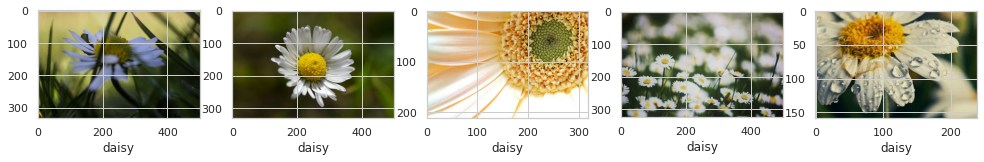

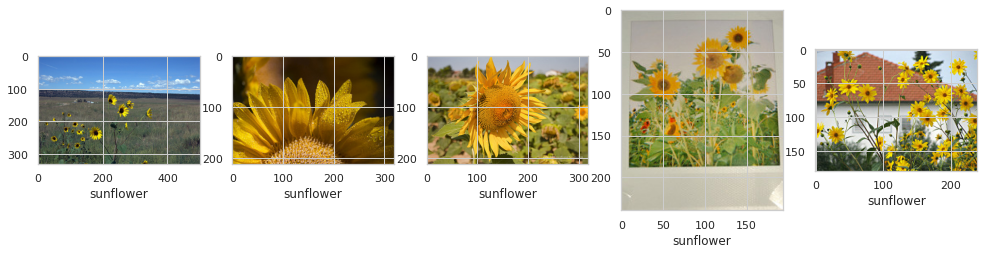

In [17]:
n = 5
## Check Image
plt.figure(figsize=(15, n))
for i in range(n):
    # read image
    sample = random.choice(os.listdir(train_dir + "/daisy"))
    # print("filename:", sample)
    img_dir = train_dir + "/daisy/" + sample
    img = cv2.imread(img_dir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plot image
    plt.subplot(1, n, 1+i)
    plt.imshow(img)
    plt.xlabel("daisy")
plt.show()   

plt.figure(figsize=(15, n))
for i in range(n):
    # read image
    sample = random.choice(os.listdir(train_dir + "/sunflower"))
    # print("filename:", sample)
    img_dir = train_dir + "/sunflower/" + sample
    img = cv2.imread(img_dir)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plot image
    plt.subplot(1, n, 1+i)
    plt.imshow(img)
    plt.xlabel("sunflower")
plt.show()   

In [10]:
## Data Augmentation 
from keras.preprocessing.image import ImageDataGenerator
# Dataset Loader
train_datagen = ImageDataGenerator(
                                rescale=1./255,
                                # rotation_range=0.2,
                                #width_shift_range=0.1,
                                #height_shift_range=0.1,
                                # shear_range=0.2,
                                #zoom_range=0.09,
                                # horizontal_flip=True,
                                # vertical_flip=False,
                                #validation_split=0.1
                                )

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
# Image Generator Config
target_size = (150, 150)
batch_size = 16

# Load Dataset
train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size=target_size,
                                                  batch_size=batch_size,
                                                  class_mode="categorical",
                                                  shuffle=True)

val_dataset = val_datagen.flow_from_directory(val_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode="categorical",
                                              shuffle=False)

Found 2592 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In [19]:
test_dataset = test_datagen.flow_from_directory(val_dir,
                                              target_size=target_size,
                                              batch_size=batch_size,
                                              class_mode="categorical",
                                              shuffle=False)

Found 430 images belonging to 5 classes.


In [20]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [21]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 18, 18, 96)       

In [23]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical
train_label=to_categorical(train_dataset)
val_label=to_categorical(val_dataset)
test_label=to_categorical(test_dataset)

In [2]:
model.fit(train_dataset,train_label,epochs=4,batch_size=128)

In [ ]:
test_loss,test_acc=model.evaluate(test_dataset,test_label)

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()